In [105]:
print('OPEN THE ZAZA')

OPEN THE ZAZA


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [107]:
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')
df.head(5)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [108]:
df = df.drop_duplicates()
df.shape
#13 duplicate values

(31875, 56)

In [109]:
#Replaces '' with nans
df.replace('', np.nan, inplace=True)
df.head(10)

#Counts miising values
df.isna().sum()

<ipython-input-109-5c9192f3f1ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('', np.nan, inplace=True)


,0
customer_id,0
customer_region,0
customer_age,727
vendor_count,0
product_count,0
is_chain,0
first_order,106
last_order,0
last_promo,0
payment_method,0


In [110]:
#Deals with missing values

for col in df:
  if df[col].dtypes == 'object':
    df[col] = df[col].fillna('Unknown')
  else:
    df[col] = df[col].fillna(df[col].median())

df.head()

<ipython-input-110-318fe290b29c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna('Unknown')
<ipython-input-110-318fe290b29c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].median())


,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,26.0,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [111]:
#df.info()
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,...,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000
mean,27.473161,3.102714,5.668424,2.819357,28.448408,63.672376,4.877205,9.955306,2.298224,0.801490,...,0.215686,0.277114,0.356580,0.391059,0.337098,0.245678,0.142871,0.071184,0.048282,0.045176
std,7.083258,2.771753,6.957933,3.977977,24.067394,23.227992,11.647043,23.561492,8.475868,6.428422,...,0.599098,0.738282,0.874598,0.943873,0.894106,0.795433,0.586641,0.348604,0.298324,0.282011
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,280.210000,896.710000,229.220000,326.100000,...,13.000000,23.000000,22.000000,20.000000,24.000000,35.000000,36.000000,11.000000,15.000000,13.000000


In [112]:
#Creates a new column of new variables of total orders by each costumer
df['Total of orders'] = df['HR_0'] + df['HR_1'] + df['HR_2'] + df['HR_3'] + df['HR_4'] + df['HR_5'] + df['HR_6'] + df['HR_7']  \
                      + df['HR_8'] + df['HR_9'] + df['HR_10'] + df['HR_11'] + df['HR_12'] + df['HR_13'] + df['HR_14'] + df['HR_15'] \
                      + df['HR_16']+ df['HR_17'] + df['HR_18'] + df['HR_19'] + df['HR_20'] + df['HR_21'] + df['HR_22'] + df['HR_23']
df['Total of orders']

,Total of orders
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
31883,1.0
31884,1.0
31885,1.0
31886,1.0


In [113]:
#Creates the the time each costumer is a client
df['Time is client'] = df['last_order'] - df['first_order']
df['Time is client']

,Time is client
0,1.0
1,1.0
2,1.0
3,2.0
4,2.0
...,...
31883,-22.0
31884,-22.0
31885,-22.0
31886,-22.0


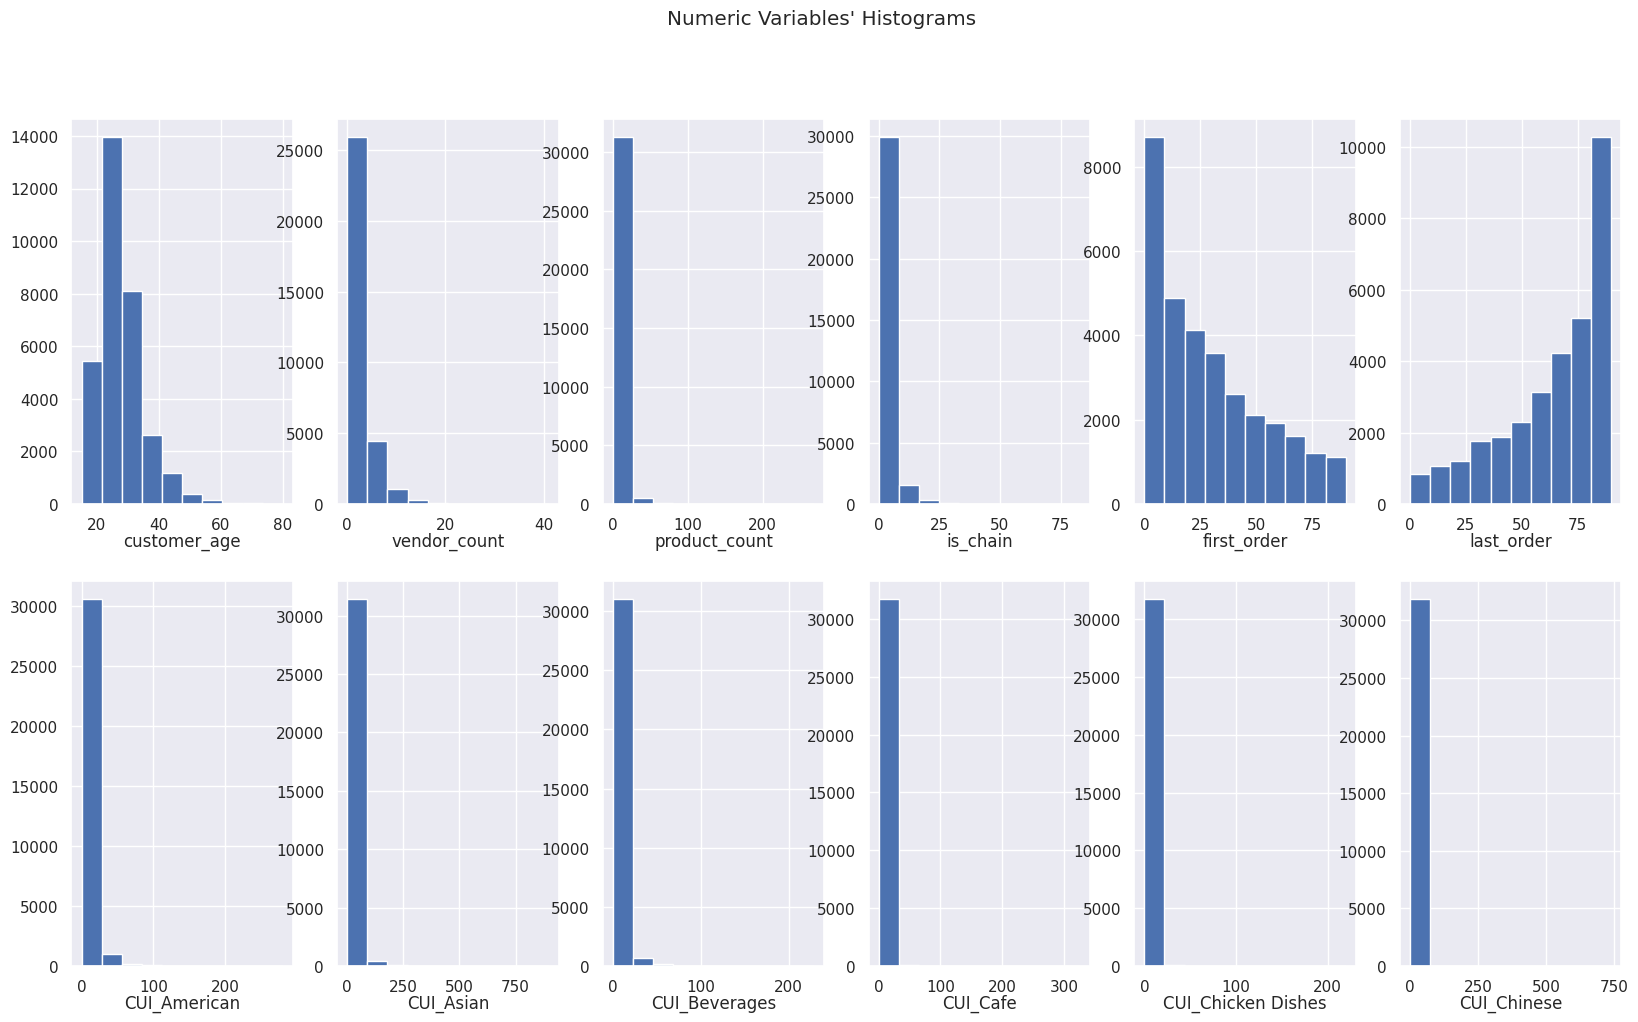

In [114]:
#Distribuition of ages
#plt.hist(df['customer_age'], bins = 4)
#plt.show()

sns.set() ## Reset to darkgrid

sp_rows = 2
sp_cols = 6

metric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows,
                         sp_cols,
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the exp_analysis directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))

plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

plt.show()